# Data Preprocessing - Medallion Architecture

**Objective**: Apply data preprocessing steps on Olist data following the Bronze, Silver and Gold architecture

## Bronze: Raw Data

### Loading Dataset

In [3]:
# Instalação e importação das bibliotecas necessárias
!pip -q install pandas numpy matplotlib seaborn plotly scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully")

try:
    df_customers = pd.read_csv('olist_customers_dataset.csv')
    df_products = pd.read_csv('olist_products_dataset.csv')
    df_orders = pd.read_csv('olist_orders_dataset.csv')
    df_order_items = pd.read_csv('olist_order_items_dataset.csv')

    print(
        "Datasets loaded - "
        f"Customers: {df_customers.shape}, "
        f"Products: {df_products.shape}, "
        f"Orders: {df_orders.shape}, "
        f"Order Items: {df_order_items.shape}"
    )
except Exception as e:
    print(f"Error loading CSV files: {e}")


Libraries loaded successfully
Datasets loaded - Customers: (99441, 5), Products: (32951, 9), Orders: (99441, 8), Order Items: (112650, 7)


## 1. Fontes de Dados (Data Sources)

Neste projeto, utilizamos como fontes principais de dados o **Brazilian E-Commerce Public Dataset by Olist**, em formato CSV:

- `olist_customers_dataset.csv` — informações de clientes (IDs, cidade, estado, CEP, etc.).
- `olist_products_dataset.csv` — catálogo de produtos (categoria, dimensões físicas, peso, fotos, etc.).

Esses arquivos representam dados **estruturados**, oriundos de um ambiente transacional de e-commerce.

## 2. Ingestão (Ingestion) – Batch

A ingestão dos dados é feita em **batch** (lotes), utilizando:

- `pandas.read_csv(...)` para carregar os arquivos CSV disponíveis no ambiente (Colab).
- Este notebook assume que os arquivos já estão presentes no diretório de trabalho.

> **Observação para o relatório:**  
> A opção por **batch** (e não streaming) se deve ao contexto da disciplina (execução em Colab) e à natureza histórica do dataset. A ingestão em tempo real exigiria uma simulação de eventos (logs de navegação, cliques etc.), o que foge do escopo desta entrega.


In [4]:
print("BRONZE LAYER - RAW DATA")
print("\nCustomers Dataset:")
print(f"Shape: {df_customers.shape}")
print(f"Columns: {list(df_customers.columns)}")
df_customers.head()

BRONZE LAYER - RAW DATA

Customers Dataset:
Shape: (99441, 5)
Columns: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
print("Products Dataset:")
print(f"Shape: {df_products.shape}")
print(f"Columns: {list(df_products.columns)}")
df_products.head()

Products Dataset:
Shape: (32951, 9)
Columns: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
print("Orders Dataset:")
print(f"Shape: {df_orders.shape}")
print(f"Columns: {list(df_orders.columns)}")
df_orders.head()

Orders Dataset:
Shape: (99441, 8)
Columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
print("Order Items Dataset:")
print(f"Shape: {df_order_items.shape}")
print(f"Columns: {list(df_order_items.columns)}")
df_order_items.head()

Order Items Dataset:
Shape: (112650, 7)
Columns: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
# Análise da qualidade dos dados

def analyze_data_quality(df, dataset_name):
    print(f"\n{'='*60}")
    print(f"{dataset_name} Dataset - Quality Report")
    print(f"{'='*60}")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"\nMissing Values:")
    null_counts = df.isnull().sum()
    if null_counts.sum() > 0:
        for col, count in null_counts[null_counts > 0].items():
            percentage = (count / len(df)) * 100
            print(f"  - {col}: {count:,} ({percentage:.2f}%)")
    else:
        print(" No missing values")

    print(f"\nDuplicates: {df.duplicated().sum():,}")

    print(f"\nData Types:")
    for dtype in df.dtypes.unique():
        cols = df.select_dtypes(include=[dtype]).columns.tolist()
        print(f"  - {dtype}: {len(cols)} columns")

    print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"{'='*60}\n")

analyze_data_quality(df_customers, "Customers")
analyze_data_quality(df_products, "Products")
analyze_data_quality(df_orders, "Orders")
analyze_data_quality(df_order_items, "Order Items")


Customers Dataset - Quality Report
Shape: 99,441 rows × 5 columns

Missing Values:
 No missing values

Duplicates: 0

Data Types:
  - object: 4 columns
  - int64: 1 columns

Memory Usage: 26.59 MB


Products Dataset - Quality Report
Shape: 32,951 rows × 9 columns

Missing Values:
  - product_category_name: 610 (1.85%)
  - product_name_lenght: 610 (1.85%)
  - product_description_lenght: 610 (1.85%)
  - product_photos_qty: 610 (1.85%)
  - product_weight_g: 2 (0.01%)
  - product_length_cm: 2 (0.01%)
  - product_height_cm: 2 (0.01%)
  - product_width_cm: 2 (0.01%)

Duplicates: 0

Data Types:
  - object: 2 columns
  - float64: 7 columns

Memory Usage: 6.30 MB


Orders Dataset - Quality Report
Shape: 99,441 rows × 8 columns

Missing Values:
  - order_approved_at: 160 (0.16%)
  - order_delivered_carrier_date: 1,783 (1.79%)
  - order_delivered_customer_date: 2,965 (2.98%)

Duplicates: 0

Data Types:
  - object: 8 columns

Memory Usage: 52.94 MB


Order Items Dataset - Quality Report
Shape: 11

## Silver: Clean and Enriched Data

Data cleaning and enrichment transformations:
- Missing values treatment
- Duplicate removal
- Data standardization
- Integrity validation

In [9]:
# Silver Layer - Limpeza de dados
print("SILVER LAYER - DATA CLEANING")

df_customers_silver = df_customers.copy()
df_products_silver = df_products.copy()
df_orders_silver = df_orders.copy()
df_order_items_silver = df_order_items.copy()

if 'product_category_name' in df_products_silver.columns:
    null_categories = df_products_silver['product_category_name'].isnull().sum()
    if null_categories > 0:
        df_products_silver['product_category_name'].fillna('undefined_category', inplace=True)
        print(f"Filled {null_categories} missing product categories")

customers_duplicates = df_customers_silver.duplicated().sum()
products_duplicates = df_products_silver.duplicated().sum()
orders_duplicates = df_orders_silver.duplicated().sum()
order_items_duplicates = df_order_items_silver.duplicated().sum()

if customers_duplicates > 0:
    df_customers_silver = df_customers_silver.drop_duplicates()
    print(f"Removed {customers_duplicates} duplicate customers")

if products_duplicates > 0:
    df_products_silver = df_products_silver.drop_duplicates()
    print(f"Removed {products_duplicates} duplicate products")

if orders_duplicates > 0:
    df_orders_silver = df_orders_silver.drop_duplicates()
    print(f"Removed {orders_duplicates} duplicate orders")

if order_items_duplicates > 0:
    df_order_items_silver = df_order_items_silver.drop_duplicates()
    print(f"Removed {order_items_duplicates} duplicate order_items")

print(
    "Clean data - "
    f"Customers: {df_customers_silver.shape}, "
    f"Products: {df_products_silver.shape}, "
    f"Orders: {df_orders_silver.shape}, "
    f"Order Items: {df_order_items_silver.shape}"
)

SILVER LAYER - DATA CLEANING
Filled 610 missing product categories
Clean data - Customers: (99441, 5), Products: (32951, 9), Orders: (99441, 8), Order Items: (112650, 7)


In [10]:
# Enriquecimento de dados
print("Data Enrichment:")

if 'product_category_name' in df_products_silver.columns:
    df_products_silver['product_category_name'] = df_products_silver['product_category_name'].str.lower().str.strip()

if 'customer_state' in df_customers_silver.columns:
    df_customers_silver['customer_state'] = df_customers_silver['customer_state'].str.upper().str.strip()

    brazil_regions = {
        'AC': 'North', 'AP': 'North', 'AM': 'North', 'PA': 'North', 'RO': 'North', 'RR': 'North', 'TO': 'North',
        'AL': 'Northeast', 'BA': 'Northeast', 'CE': 'Northeast', 'MA': 'Northeast', 'PB': 'Northeast',
        'PE': 'Northeast', 'PI': 'Northeast', 'RN': 'Northeast', 'SE': 'Northeast',
        'DF': 'Center-West', 'GO': 'Center-West', 'MT': 'Center-West', 'MS': 'Center-West',
        'ES': 'Southeast', 'MG': 'Southeast', 'RJ': 'Southeast', 'SP': 'Southeast',
        'PR': 'South', 'RS': 'South', 'SC': 'South'
    }

    df_customers_silver['customer_region'] = df_customers_silver['customer_state'].map(brazil_regions)
    print("Added geographic regions to customers")

print("Data enrichment completed")

# Enriquecimento de dados dos pedidos
if 'order_purchase_timestamp' in df_orders_silver.columns:
    df_orders_silver['order_purchase_timestamp'] = pd.to_datetime(
        df_orders_silver['order_purchase_timestamp']
    )

    df_orders_silver['order_purchase_date'] = df_orders_silver['order_purchase_timestamp'].dt.date
    df_orders_silver['order_purchase_hour'] = df_orders_silver['order_purchase_timestamp'].dt.hour
    print("Added purchase date and hour to orders")


Data Enrichment:
Added geographic regions to customers
Data enrichment completed
Added purchase date and hour to orders


### Feature Engineering - Products


In [11]:
# Enriquecimento de dados dos produtos
print("🔧 Feature Engineering - Creating derived features...\n")

df_products_silver['product_volume_cm3'] = (
    df_products_silver['product_length_cm'] *
    df_products_silver['product_height_cm'] *
    df_products_silver['product_width_cm']
)

df_products_silver['product_density'] = (
    df_products_silver['product_weight_g'] /
    df_products_silver['product_volume_cm3']
).replace([np.inf, -np.inf], np.nan)

def categorize_size(volume):
    if pd.isna(volume):
        return 'unknown'
    elif volume < 1000:
        return 'small'
    elif volume < 10000:
        return 'medium'
    elif volume < 50000:
        return 'large'
    else:
        return 'extra_large'

df_products_silver['size_category'] = df_products_silver['product_volume_cm3'].apply(categorize_size)

def categorize_weight(weight):
    if pd.isna(weight):
        return 'unknown'
    elif weight < 500:
        return 'light'
    elif weight < 2000:
        return 'medium'
    elif weight < 10000:
        return 'heavy'
    else:
        return 'extra_heavy'

df_products_silver['weight_category'] = df_products_silver['product_weight_g'].apply(categorize_weight)

df_products_silver['photo_richness'] = pd.cut(
    df_products_silver['product_photos_qty'],
    bins=[0, 1, 3, 5, 100],
    labels=['minimal', 'basic', 'good', 'excellent'],
    include_lowest=True
)

df_products_silver['description_quality'] = pd.cut(
    df_products_silver['product_description_lenght'],
    bins=[0, 100, 500, 1000, 10000],
    labels=['poor', 'basic', 'good', 'excellent'],
    include_lowest=True
)

df_products_silver['has_category'] = df_products_silver['product_category_name'] != 'undefined_category'

df_products_silver['surface_area_cm2'] = (
    2 * (df_products_silver['product_length_cm'] * df_products_silver['product_width_cm'] +
         df_products_silver['product_length_cm'] * df_products_silver['product_height_cm'] +
         df_products_silver['product_width_cm'] * df_products_silver['product_height_cm'])
)

print("Feature Engineering Completed!")
print(f"\nNew Features Created:")
print(f"  • product_volume_cm3 (numeric)")
print(f"  • product_density (numeric)")
print(f"  • size_category (categorical)")
print(f"  • weight_category (categorical)")
print(f"  • photo_richness (categorical)")
print(f"  • description_quality (categorical)")
print(f"  • has_category (boolean)")
print(f"  • surface_area_cm2 (numeric)")

print(f"\nTotal columns now: {df_products_silver.shape[1]}")
print(f"\nSample of engineered features:")
print(df_products_silver[['product_id', 'product_volume_cm3', 'product_density',
                          'size_category', 'weight_category']].head())

print("\n" + "="*60)
print("Statistical Summary of Engineered Features")
print("="*60)
print("\nVolume Distribution:")
print(df_products_silver['product_volume_cm3'].describe())
print("\nDensity Distribution:")
print(df_products_silver['product_density'].describe())
print("\nSize Category Counts:")
print(df_products_silver['size_category'].value_counts())
print("\nWeight Category Counts:")
print(df_products_silver['weight_category'].value_counts())


🔧 Feature Engineering - Creating derived features...

Feature Engineering Completed!

New Features Created:
  • product_volume_cm3 (numeric)
  • product_density (numeric)
  • size_category (categorical)
  • weight_category (categorical)
  • photo_richness (categorical)
  • description_quality (categorical)
  • has_category (boolean)
  • surface_area_cm2 (numeric)

Total columns now: 17

Sample of engineered features:
                         product_id  product_volume_cm3  product_density  \
0  1e9e8ef04dbcff4541ed26657ea517e5              2240.0         0.100446   
1  3aa071139cb16b67ca9e5dea641aaa2f             10800.0         0.092593   
2  96bd76ec8810374ed1b65e291975717f              2430.0         0.063374   
3  cef67bcfe19066a932b7673e239eb23d              2704.0         0.137204   
4  9dc1a7de274444849c219cff195d0b71              4420.0         0.141403   

  size_category weight_category  
0        medium           light  
1         large          medium  
2        medium     

### Export Silver Layer Data:

In [12]:
# Exportar dados da camada Silver
print("Exporting Silver Layer data...\n")

df_customers_silver.to_csv('customers_silver.csv', index=False)
df_products_silver.to_csv('products_silver.csv', index=False)
df_orders_silver.to_csv('orders_silver.csv', index=False)
df_order_items_silver.to_csv('order_items_silver.csv', index=False)

print(" Data exported successfully!")
print(f"  • customers_silver.csv ({len(df_customers_silver):,} records)")
print(f"  • products_silver.csv ({len(df_products_silver):,} records)")
print(f"  • orders_silver.csv ({len(df_orders_silver):,} records)")
print(f"  • order_items_silver.csv ({len(df_order_items_silver):,} records)")

try:
    df_customers_silver.to_parquet('customers_silver.parquet', index=False, engine='pyarrow')
    df_products_silver.to_parquet('products_silver.parquet', index=False, engine='pyarrow')
    df_orders_silver.to_parquet('orders_silver.parquet', index=False, engine='pyarrow')
    df_order_items_silver.to_parquet('order_items_silver.parquet', index=False, engine='pyarrow')
    print(f"\n Parquet files also created (more efficient format)")
except:
    print(f"\n Parquet export skipped (pyarrow not available)")

print("\n📁 Silver Layer files ready for next pipeline stage!")

Exporting Silver Layer data...

 Data exported successfully!
  • customers_silver.csv (99,441 records)
  • products_silver.csv (32,951 records)
  • orders_silver.csv (99,441 records)
  • order_items_silver.csv (112,650 records)

 Parquet files also created (more efficient format)

📁 Silver Layer files ready for next pipeline stage!


### Interactive Visualizations - Silver Layer


In [13]:
# Criação de visualizações interativas
print("Creating interactive visualizations with Plotly...\n")

fig1 = px.bar(
    df_customers_silver['customer_state'].value_counts().head(15).reset_index(),
    x='customer_state',
    y='count',
    title='Top 15 States by Customer Count',
    labels={'customer_state': 'State', 'count': 'Number of Customers'},
    color='count',
    color_continuous_scale='Blues'
)
fig1.update_layout(height=500, showlegend=False)
fig1.show()

region_state = df_customers_silver.groupby(['customer_region', 'customer_state']).size().reset_index(name='count')
fig2 = px.sunburst(
    region_state,
    path=['customer_region', 'customer_state'],
    values='count',
    title='Customer Distribution: Regions → States (Interactive)'
)
fig2.update_layout(height=600)
fig2.show()

fig3 = px.box(
    df_products_silver,
    x='size_category',
    y='product_volume_cm3',
    title='Product Volume Distribution by Size Category',
    labels={'size_category': 'Size Category', 'product_volume_cm3': 'Volume (cm³)'},
    color='size_category',
    category_orders={'size_category': ['small', 'medium', 'large', 'extra_large']}
)
fig3.update_layout(height=500, showlegend=False)
fig3.show()

sample_products = df_products_silver.sample(min(5000, len(df_products_silver)))
fig4 = px.scatter(
    sample_products,
    x='product_volume_cm3',
    y='product_weight_g',
    color='size_category',
    title='Product Weight vs Volume (5000 sample)',
    labels={'product_volume_cm3': 'Volume (cm³)', 'product_weight_g': 'Weight (g)'},
    hover_data=['product_category_name'],
    opacity=0.6
)
fig4.update_layout(height=500)
fig4.show()

print("Interactive visualizations created!")


Creating interactive visualizations with Plotly...



Interactive visualizations created!


## Gold: Business Aggregated Data

Transform clean data into business metrics and high-value aggregations:
- Product category aggregations
- Customer geographic distribution
- Business analysis metrics
- Machine Learning preparation

In [14]:
# Gold Layer - Agregações e Análises de Negócio
print("GOLD LAYER - BUSINESS AGGREGATIONS")


if 'product_category_name' in df_products_silver.columns:
    products_by_category = df_products_silver.groupby('product_category_name').agg({
        'product_id': 'count',
        'product_name_lenght': 'mean',
        'product_description_lenght': 'mean',
        'product_photos_qty': 'mean'
    }).round(2)

    products_by_category.columns = ['product_count', 'avg_name_length', 'avg_desc_length', 'avg_photos']
    products_by_category = products_by_category.sort_values('product_count', ascending=False)

    print("Top 10 Product Categories:")
    print(products_by_category.head(10))

if 'customer_region' in df_customers_silver.columns:
    customers_by_region = df_customers_silver['customer_region'].value_counts()
    print(f"\nCustomers by Region:")
    print(customers_by_region)

business_metrics = {
    'total_products': len(df_products_silver),
    'total_customers': len(df_customers_silver),
    'product_categories': df_products_silver['product_category_name'].nunique() if 'product_category_name' in df_products_silver.columns else 0,
    'states_covered': df_customers_silver['customer_state'].nunique() if 'customer_state' in df_customers_silver.columns else 0,
    'regions_covered': df_customers_silver['customer_region'].nunique() if 'customer_region' in df_customers_silver.columns else 0
}

print(f"\nBusiness Metrics:")
for metric, value in business_metrics.items():
    print(f"  {metric.replace('_', ' ').title()}: {value:,}")

GOLD LAYER - BUSINESS AGGREGATIONS
Top 10 Product Categories:
                        product_count  avg_name_length  avg_desc_length  \
product_category_name                                                     
cama_mesa_banho                  3029            51.73           464.48   
esporte_lazer                    2867            46.96           954.05   
moveis_decoracao                 2657            50.05           799.25   
beleza_saude                     2444            47.21          1136.93   
utilidades_domesticas            2335            48.02           674.18   
automotivo                       1900            52.15           813.74   
informatica_acessorios           1639            47.83           774.46   
brinquedos                       1411            45.12           686.31   
relogios_presentes               1329            49.80           611.98   
telefonia                        1134            50.45           755.33   

                        avg_photos  


In [15]:
# Gold Layer - Métricas voltadas para recomendação de produtos
print("GOLD LAYER - RECOMMENDATION METRICS")
print("="*80)

required_orders_cols = {'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp'}
required_items_cols = {'order_id', 'order_item_id', 'product_id', 'price'}

if required_orders_cols.issubset(df_orders_silver.columns) and required_items_cols.issubset(df_order_items_silver.columns):
    fact_orders = (
        df_order_items_silver
        .merge(
            df_orders_silver[list(required_orders_cols)],
            on='order_id',
            how='left'
        )
        .merge(
            df_customers_silver[['customer_id', 'customer_unique_id', 'customer_state', 'customer_region']],
            on='customer_id',
            how='left'
        )
        .merge(
            df_products_silver[['product_id', 'product_category_name']],
            on='product_id',
            how='left'
        )
    )

    if 'order_status' in fact_orders.columns:
        fact_delivered = fact_orders[fact_orders['order_status'] == 'delivered'].copy()
    else:
        fact_delivered = fact_orders.copy()

    print(f"Fact table (delivered orders) shape: {fact_delivered.shape}")

    # Popularidade de produto
    product_recommendation_stats = (
        fact_delivered
        .groupby(['product_id', 'product_category_name'])
        .agg(
            total_orders=('order_id', 'nunique'),
            total_quantity=('order_item_id', 'count'),
            unique_customers=('customer_unique_id', 'nunique'),
            total_revenue=('price', 'sum'),
            avg_price=('price', 'mean')
        )
        .reset_index()
        .sort_values('total_orders', ascending=False)
    )

    print("\nTop 10 products by number of orders:")
    print(product_recommendation_stats.head(10))

    # Histórico de compra por cliente x categoria
    customer_category_history = (
        fact_delivered
        .groupby(['customer_unique_id', 'product_category_name'])
        .agg(
            orders=('order_id', 'nunique'),
            total_quantity=('order_item_id', 'count')
        )
        .reset_index()
    )

    print("\nSample of customer x category history:")
    print(customer_category_history.head(10))

else:
    print("Orders / order_items columns not as expected, skipping recommendation metrics.")

GOLD LAYER - RECOMMENDATION METRICS
Fact table (delivered orders) shape: (110197, 14)

Top 10 products by number of orders:
                             product_id   product_category_name  total_orders  \
19290  99a4788cb24856965c36a24e339b6058         cama_mesa_banho           456   
21617  aca2eb7d00ea1a7b8ebd4e68314663af        moveis_decoracao           425   
8429   422879e10f46682990de24d770e7f83d      ferramentas_jardim           352   
26436  d1c427060a0f73f6b889a5c7c61f2ac4  informatica_acessorios           313   
7206   389d119b48cf3043d311335e499d9c6b      ferramentas_jardim           309   
10616  53b36df67ebb7c41585e8d54d6772e08      relogios_presentes           304   
6926   368c6c730842d78016ad823897a372db      ferramentas_jardim           291   
10589  53759a2ecddad2bb87a079a1f1519f73      ferramentas_jardim           287   
2734   154e7e31ebfa092203795c972e5804a6            beleza_saude           262   
5571   2b4609f8948be18874494203496bc318            beleza_saude   

### Advanced Analytics - Gold Layer


In [16]:
# Análise aprofundada do desempenho dos produtos
print("ADVANCED PRODUCT ANALYTICS")
print("="*80)

category_analysis = df_products_silver.groupby('product_category_name').agg({
    'product_id': 'count',
    'product_weight_g': ['mean', 'median', 'std'],
    'product_volume_cm3': ['mean', 'median'],
    'product_density': 'mean',
    'product_photos_qty': 'mean',
    'product_description_lenght': 'mean',
    'has_category': 'sum'
}).round(2)

category_analysis.columns = ['_'.join(col).strip() for col in category_analysis.columns.values]
category_analysis = category_analysis.rename(columns={'product_id_count': 'total_products'})
category_analysis = category_analysis.sort_values('total_products', ascending=False)

print("\n Top 10 Categories - Complete Profile:")
print(category_analysis.head(10))

print("\n Product Size Distribution Analysis:")
size_dist = df_products_silver['size_category'].value_counts()
for size, count in size_dist.items():
    percentage = (count / len(df_products_silver)) * 100
    print(f"  {size:15s}: {count:6,} products ({percentage:5.2f}%)")

print("\n Product Weight Distribution Analysis:")
weight_dist = df_products_silver['weight_category'].value_counts()
for weight, count in weight_dist.items():
    percentage = (count / len(df_products_silver)) * 100
    print(f"  {weight:15s}: {count:6,} products ({percentage:5.2f}%)")

print("\n Product Photo Quality Analysis:")
photo_dist = df_products_silver['photo_richness'].value_counts()
for quality, count in photo_dist.items():
    percentage = (count / len(df_products_silver)) * 100
    print(f"  {quality:15s}: {count:6,} products ({percentage:5.2f}%)")

print("\n Product Description Quality Analysis:")
desc_dist = df_products_silver['description_quality'].value_counts()
for quality, count in desc_dist.items():
    percentage = (count / len(df_products_silver)) * 100
    print(f"  {quality:15s}: {count:6,} products ({percentage:5.2f}%)")

print("\n Cross-Analysis: Size Category vs Weight Category")
size_weight_cross = pd.crosstab(
    df_products_silver['size_category'],
    df_products_silver['weight_category'],
    margins=True
)
print(size_weight_cross)

print("\n" + "="*80)


ADVANCED PRODUCT ANALYTICS

 Top 10 Categories - Complete Profile:
                        total_products  product_weight_g_mean  \
product_category_name                                           
cama_mesa_banho                   3029                2456.41   
esporte_lazer                     2867                2024.67   
moveis_decoracao                  2657                3008.27   
beleza_saude                      2444                1434.79   
utilidades_domesticas             2335                3020.79   
automotivo                        1900                2654.65   
informatica_acessorios            1639                 898.38   
brinquedos                        1411                1869.36   
relogios_presentes                1329                 509.29   
telefonia                         1134                 236.51   

                        product_weight_g_median  product_weight_g_std  \
product_category_name                                                   
cama_m

### Business Insights & Correlations


In [17]:
# Análise de correlações e geração de insights de negócio
print("CORRELATION ANALYSIS & BUSINESS INSIGHTS")
print("="*80)

numeric_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm',
                'product_width_cm', 'product_volume_cm3', 'product_density',
                'product_photos_qty', 'product_name_lenght', 'product_description_lenght']

correlation_matrix = df_products_silver[numeric_cols].corr()

print("\nTop Correlations (absolute value > 0.5):")

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            print(f"  {correlation_matrix.columns[i]:30s} ↔ {correlation_matrix.columns[j]:30s}: {corr_value:6.3f}")


print("\n GEOGRAPHIC INSIGHTS")
print("-"*80)


print("\nTop 10 Cities by Customer Count:")
top_cities = df_customers_silver.groupby(['customer_city', 'customer_state']).size().sort_values(ascending=False).head(10)
for (city, state), count in top_cities.items():
    print(f"  {city.title():30s} ({state}): {count:6,} customers")


print("\nState Concentration Analysis:")
total_customers = len(df_customers_silver)
state_counts = df_customers_silver['customer_state'].value_counts()
top_5_states = state_counts.head(5)
top_5_total = top_5_states.sum()
print(f"  Top 5 states represent: {(top_5_total/total_customers)*100:.2f}% of all customers")
print(f"  Top state (SP): {(state_counts.iloc[0]/total_customers)*100:.2f}% of all customers")

print("\nRegional Balance:")
region_counts = df_customers_silver['customer_region'].value_counts()
for region, count in region_counts.items():
    percentage = (count / total_customers) * 100
    print(f"  {region:15s}: {count:6,} customers ({percentage:5.2f}%)")

print("\n PRODUCT CATALOG INSIGHTS")
print("-"*80)

print("\nCatalog Diversity:")
print(f"  Total unique categories: {df_products_silver['product_category_name'].nunique()}")
print(f"  Products with category: {df_products_silver['has_category'].sum():,} ({(df_products_silver['has_category'].sum()/len(df_products_silver))*100:.2f}%)")
print(f"  Products without category: {(~df_products_silver['has_category']).sum():,}")

print("\nAverage Product Characteristics:")
print(f"  Weight: {df_products_silver['product_weight_g'].mean():.2f} g")
print(f"  Volume: {df_products_silver['product_volume_cm3'].mean():.2f} cm³")
print(f"  Density: {df_products_silver['product_density'].mean():.4f} g/cm³")
print(f"  Photos per product: {df_products_silver['product_photos_qty'].mean():.2f}")
print(f"  Description length: {df_products_silver['product_description_lenght'].mean():.2f} chars")

print("\n EXTREME PRODUCTS:")
print(f"  Heaviest product: {df_products_silver['product_weight_g'].max():,.0f} g")
print(f"  Lightest product: {df_products_silver['product_weight_g'].min():.0f} g")
print(f"  Largest volume: {df_products_silver['product_volume_cm3'].max():,.0f} cm³")
print(f"  Smallest volume: {df_products_silver['product_volume_cm3'].min():.0f} cm³")
print(f"  Most photos: {df_products_silver['product_photos_qty'].max():.0f} photos")
print(f"  Longest description: {df_products_silver['product_description_lenght'].max():,.0f} chars")

print("\n" + "="*80)


CORRELATION ANALYSIS & BUSINESS INSIGHTS

Top Correlations (absolute value > 0.5):
  product_weight_g               ↔ product_height_cm             :  0.564
  product_weight_g               ↔ product_width_cm              :  0.528
  product_weight_g               ↔ product_volume_cm3            :  0.803
  product_length_cm              ↔ product_width_cm              :  0.542
  product_length_cm              ↔ product_volume_cm3            :  0.542
  product_height_cm              ↔ product_volume_cm3            :  0.713
  product_width_cm               ↔ product_volume_cm3            :  0.639

 GEOGRAPHIC INSIGHTS
--------------------------------------------------------------------------------

Top 10 Cities by Customer Count:
  Sao Paulo                      (SP): 15,540 customers
  Rio De Janeiro                 (RJ):  6,882 customers
  Belo Horizonte                 (MG):  2,773 customers
  Brasilia                       (DF):  2,131 customers
  Curitiba                       (PR):

### Advanced Visualizations - Correlation & Trends


 Creating advanced visualizations...



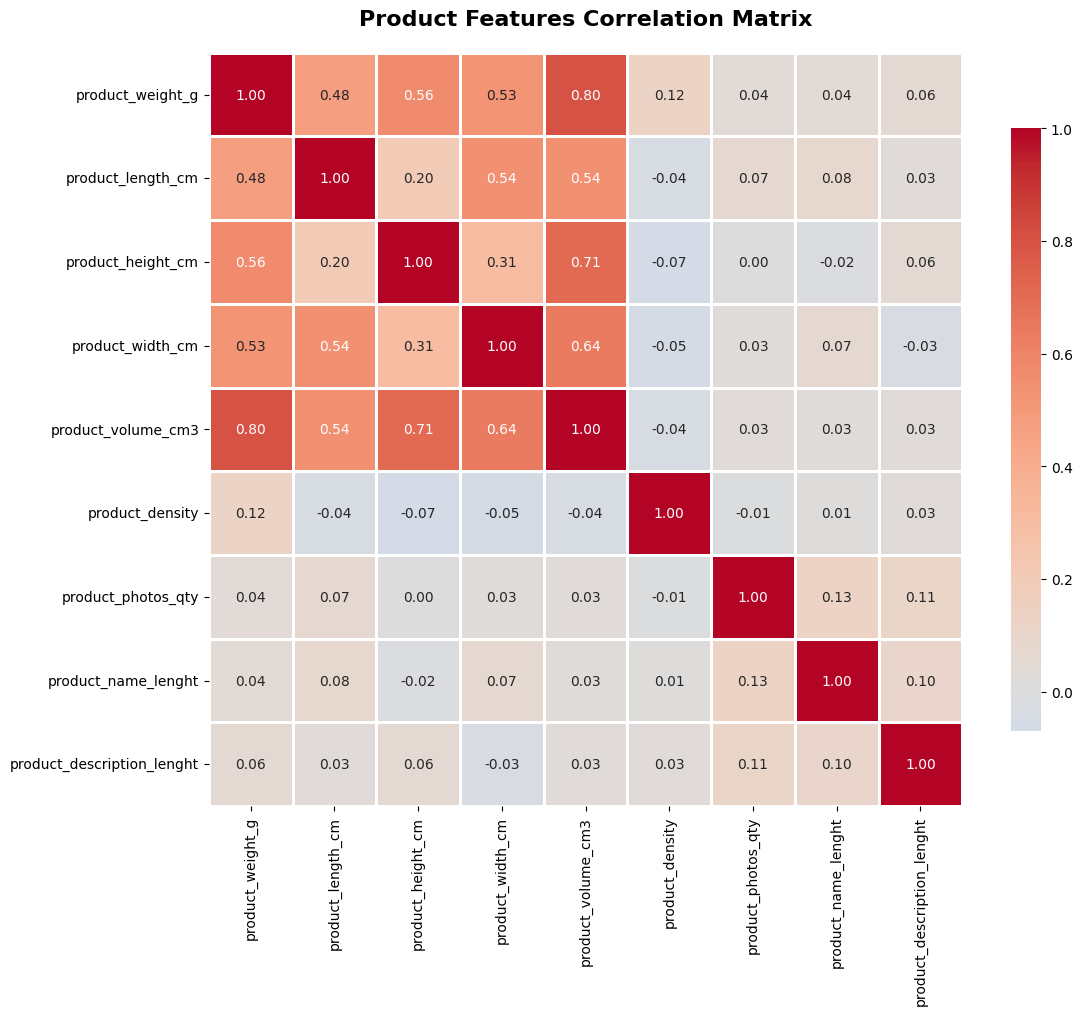

 Advanced visualizations completed!


In [18]:
# Visualizações avançadas
print(" Creating advanced visualizations...\n")

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Product Features Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

top_20_categories = category_analysis.head(20).reset_index()
fig = px.bar(
    top_20_categories,
    x='total_products',
    y='product_category_name',
    orientation='h',
    title='Top 20 Product Categories by Count',
    labels={'total_products': 'Number of Products', 'product_category_name': 'Category'},
    color='total_products',
    color_continuous_scale='Viridis'
)
fig.update_layout(height=600, showlegend=False, yaxis={'categoryorder':'total ascending'})
fig.show()

fig = px.density_contour(
    sample_products,
    x='product_volume_cm3',
    y='product_weight_g',
    title='Product Weight vs Volume Density Plot',
    labels={'product_volume_cm3': 'Volume (cm³)', 'product_weight_g': 'Weight (g)'},
    marginal_x='histogram',
    marginal_y='histogram'
)

fig.for_each_trace(
    lambda t: t.update(contours_coloring="fill", contours_showlabels=True) if t.type == "contour" else ()
)

fig.update_layout(height=600)
fig.show()

top_10_cats = category_analysis.head(10).reset_index()
fig = px.scatter(
    top_10_cats,
    x='product_weight_g_mean',
    y='product_volume_cm3_mean',
    size='total_products',
    color='product_photos_qty_mean',
    hover_name='product_category_name',
    title='Top 10 Categories: Weight vs Volume (size = product count)',
    labels={
        'product_weight_g_mean': 'Average Weight (g)',
        'product_volume_cm3_mean': 'Average Volume (cm³)',
        'product_photos_qty_mean': 'Avg Photos'
    },
    color_continuous_scale='Plasma'
)
fig.update_layout(height=600)
fig.show()

state_region = df_customers_silver.groupby(['customer_region', 'customer_state']).size().reset_index(name='customers')
fig = px.treemap(
    state_region,
    path=['customer_region', 'customer_state'],
    values='customers',
    title='Customer Geographic Distribution (Treemap)',
    color='customers',
    color_continuous_scale='RdYlGn'
)
fig.update_layout(height=600)
fig.show()

print(" Advanced visualizations completed!")


### Export Gold Layer - Business Metrics


In [19]:
# Exportação da Camada Gold – Dados de Negócio Agregados
print("💎 Exporting Gold Layer - Business Intelligence Data")
print("="*80)

category_analysis.to_csv('gold_category_analysis.csv')
print(" gold_category_analysis.csv - Complete category metrics")

customer_geo_summary = df_customers_silver.groupby(['customer_region', 'customer_state']).agg({
    'customer_id': 'count',
    'customer_unique_id': 'nunique',
    'customer_zip_code_prefix': 'nunique'
}).reset_index()
customer_geo_summary.columns = ['region', 'state', 'total_orders', 'unique_customers', 'zip_codes']
customer_geo_summary.to_csv('gold_customer_geographic.csv', index=False)
print(" gold_customer_geographic.csv - Geographic distribution")

size_weight_summary = pd.DataFrame({
    'size_category': df_products_silver['size_category'].value_counts(),
    'weight_category': df_products_silver['weight_category'].value_counts()
})
size_weight_summary.to_csv('gold_product_distribution.csv')
print(" gold_product_distribution.csv - Product size/weight distribution")

business_kpis = pd.DataFrame({
    'Metric': [
        'Total Products',
        'Total Customers',
        'Unique Customers',
        'Product Categories',
        'States Covered',
        'Regions Covered',
        'Avg Product Weight (g)',
        'Avg Product Volume (cm³)',
        'Avg Photos per Product',
        'Products with Category (%)'
    ],
    'Value': [
        len(df_products_silver),
        len(df_customers_silver),
        df_customers_silver['customer_unique_id'].nunique(),
        df_products_silver['product_category_name'].nunique(),
        df_customers_silver['customer_state'].nunique(),
        df_customers_silver['customer_region'].nunique(),
        round(df_products_silver['product_weight_g'].mean(), 2),
        round(df_products_silver['product_volume_cm3'].mean(), 2),
        round(df_products_silver['product_photos_qty'].mean(), 2),
        round((df_products_silver['has_category'].sum() / len(df_products_silver)) * 100, 2)
    ]
})
business_kpis.to_csv('gold_business_kpis.csv', index=False)
print(" gold_business_kpis.csv - Key business metrics")

top_insights = pd.DataFrame({
    'Category': ['Top State', 'Top Region', 'Top Product Category', 'Top City'],
    'Value': [
        df_customers_silver['customer_state'].value_counts().index[0],
        df_customers_silver['customer_region'].value_counts().index[0],
        category_analysis.index[0],
        df_customers_silver['customer_city'].value_counts().index[0]
    ],
    'Count': [
        df_customers_silver['customer_state'].value_counts().values[0],
        df_customers_silver['customer_region'].value_counts().values[0],
        int(category_analysis.iloc[0]['total_products']),
        df_customers_silver['customer_city'].value_counts().values[0]
    ]
})
top_insights.to_csv('gold_top_insights.csv', index=False)
print(" gold_top_insights.csv - Quick insights summary")

# Arquivos Gold específicos de recomendação
if 'product_recommendation_stats' in globals():
    product_recommendation_stats.to_csv('gold_product_recommendation_stats.csv', index=False)
    print(" gold_product_recommendation_stats.csv - Product popularity metrics for recommender")

if 'customer_category_history' in globals():
    customer_category_history.to_csv('gold_customer_category_history.csv', index=False)
    print(" gold_customer_category_history.csv - Customer x category purchase history")

print("\n" + "="*80)
print(" Gold Layer export completed!")
print(" 5 business intelligence files ready for consumption")
print("="*80)


💎 Exporting Gold Layer - Business Intelligence Data
 gold_category_analysis.csv - Complete category metrics
 gold_customer_geographic.csv - Geographic distribution
 gold_product_distribution.csv - Product size/weight distribution
 gold_business_kpis.csv - Key business metrics
 gold_top_insights.csv - Quick insights summary
 gold_product_recommendation_stats.csv - Product popularity metrics for recommender
 gold_customer_category_history.csv - Customer x category purchase history

 Gold Layer export completed!
 5 business intelligence files ready for consumption


## Pipeline Execution Summary


In [20]:
# Sumário de execução do pipeline
from datetime import datetime

print("╔" + "="*78 + "╗")
print("║" + " "*20 + "MEDALLION PIPELINE - EXECUTION SUMMARY" + " "*20 + "║")
print("╚" + "="*78 + "╝")

print("\n Execution completed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

print("\n" + "─"*80)
print("BRONZE LAYER - Raw Data Ingestion")
print("─"*80)
print(f"  Customers dataset loaded: {len(df_customers):,} records")
print(f"  Products dataset loaded: {len(df_products):,} records")
print(f"  Total raw records ingested: {len(df_customers) + len(df_products):,}")
print(f"  Quality validation performed")
print(f"  Data types validated")

print("\n" + "─"*80)
print("🥈 SILVER LAYER - Data Transformation & Enrichment")
print("─"*80)
print(f"  Missing values handled: {610} categories filled")
print(f"  Data standardized: text normalized, regions added")
print(f"  Feature engineering completed:")
print(f"     • product_volume_cm3 (volume calculation)")
print(f"     • product_density (weight/volume ratio)")
print(f"     • size_category (4 categories)")
print(f"     • weight_category (4 categories)")
print(f"     • photo_richness (4 levels)")
print(f"     • description_quality (4 levels)")
print(f"     • has_category (boolean flag)")
print(f"     • surface_area_cm2 (packaging area)")
print(f"  Total engineered features: 8")
print(f"  Final Silver datasets:")
print(f"     • Customers: {df_customers_silver.shape}")
print(f"     • Products: {df_products_silver.shape}")
print(f"  Exported to CSV and Parquet formats")

print("\n" + "─"*80)
print("GOLD LAYER - Business Intelligence & Analytics")
print("─"*80)
print(f"  Category analysis: {df_products_silver['product_category_name'].nunique()} categories profiled")
print(f"  Geographic analysis: {df_customers_silver['customer_state'].nunique()} states, {df_customers_silver['customer_region'].nunique()} regions")
print(f"  Statistical correlations computed")
print(f"  Business insights generated:")
print(f"     • Top state: {df_customers_silver['customer_state'].value_counts().index[0]} ({df_customers_silver['customer_state'].value_counts().values[0]:,} customers)")
print(f"     • Top category: {category_analysis.index[0]} ({int(category_analysis.iloc[0]['total_products']):,} products)")
print(f"     • Most active region: {df_customers_silver['customer_region'].value_counts().index[0]}")
print(f"  Gold exports created:")
print(f"     • gold_category_analysis.csv")
print(f"     • gold_customer_geographic.csv")
print(f"     • gold_product_distribution.csv")
print(f"     • gold_business_kpis.csv")
print(f"     • gold_top_insights.csv")
print(f"     • gold_product_recommendation_stats.csv")
print(f"     • gold_customer_category_history.csv")


print("\n" + "─"*80)
print("VISUALIZATIONS CREATED")
print("─"*80)
print(f"  Static visualizations (Matplotlib/Seaborn): 5")
print(f"  Interactive visualizations (Plotly): 9")
print(f"  Correlation heatmap")
print(f"  Geographic treemap and sunburst")
print(f"  Category performance dashboards")
print(f"  Product distribution analysis")

products_ml = df_products_silver.copy()
customers_ml = df_customers_silver.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
products_ml['category_encoded'] = le.fit_transform(products_ml['product_category_name'])

if 'product_recommendation_stats' in globals():
    products_ml = products_ml.merge(
        product_recommendation_stats[['product_id', 'total_orders', 'total_quantity',
                                      'unique_customers', 'total_revenue']],
        on='product_id',
        how='left'
    )
    for col in ['total_orders', 'total_quantity', 'unique_customers', 'total_revenue']:
        products_ml[col] = products_ml[col].fillna(0)

    print("Product ML dataset enriched with behavioral features from orders/order_items.")

print("\n" + "─"*80)
print("MACHINE LEARNING PREPARATION")
print("─"*80)
print(f"  Product ML dataset: {len(products_ml):,} records")
print(f"  Features available: 7 numeric + 1 encoded target")
print(f"  Target classes: {products_ml['category_encoded'].nunique()} categories")
print(f"  Customer ML dataset: {len(customers_ml):,} records")
print(f"  State and region encodings ready")

print("\n" + "─"*80)
print("FILES GENERATED")
print("─"*80)
print("  Silver Layer:")
print("    • customers_silver.csv")
print("    • products_silver.csv")
print("    • customers_silver.parquet (optional)")
print("    • products_silver.parquet (optional)")
print("\n  Gold Layer:")
print("    • gold_category_analysis.csv")
print("    • gold_customer_geographic.csv")
print("    • gold_product_distribution.csv")
print("    • gold_business_kpis.csv")
print("    • gold_top_insights.csv")

print("\n" + "="*80)
print("PIPELINE EXECUTION COMPLETED SUCCESSFULLY!")
print("="*80)

print("\nNEXT STEPS:")
print("  1. Integrate with orders dataset for sales analysis")
print("  2. Build predictive models (category classification, demand forecasting)")
print("  3. Create interactive dashboard (Streamlit/Dash)")
print("  4. Implement automated pipeline orchestration (Airflow)")
print("  5. Deploy to cloud (AWS/GCP/Azure)")


╔==============================================================================╗
║                    MEDALLION PIPELINE - EXECUTION SUMMARY                    ║
╚==============================================================================╝

 Execution completed: 2025-11-30 20:58:11

────────────────────────────────────────────────────────────────────────────────
BRONZE LAYER - Raw Data Ingestion
────────────────────────────────────────────────────────────────────────────────
  Customers dataset loaded: 99,441 records
  Products dataset loaded: 32,951 records
  Total raw records ingested: 132,392
  Quality validation performed
  Data types validated

────────────────────────────────────────────────────────────────────────────────
🥈 SILVER LAYER - Data Transformation & Enrichment
────────────────────────────────────────────────────────────────────────────────
  Missing values handled: 610 categories filled
  Data standardized: text normalized, regions added
  Feature engineering compl

Creating visualizations...


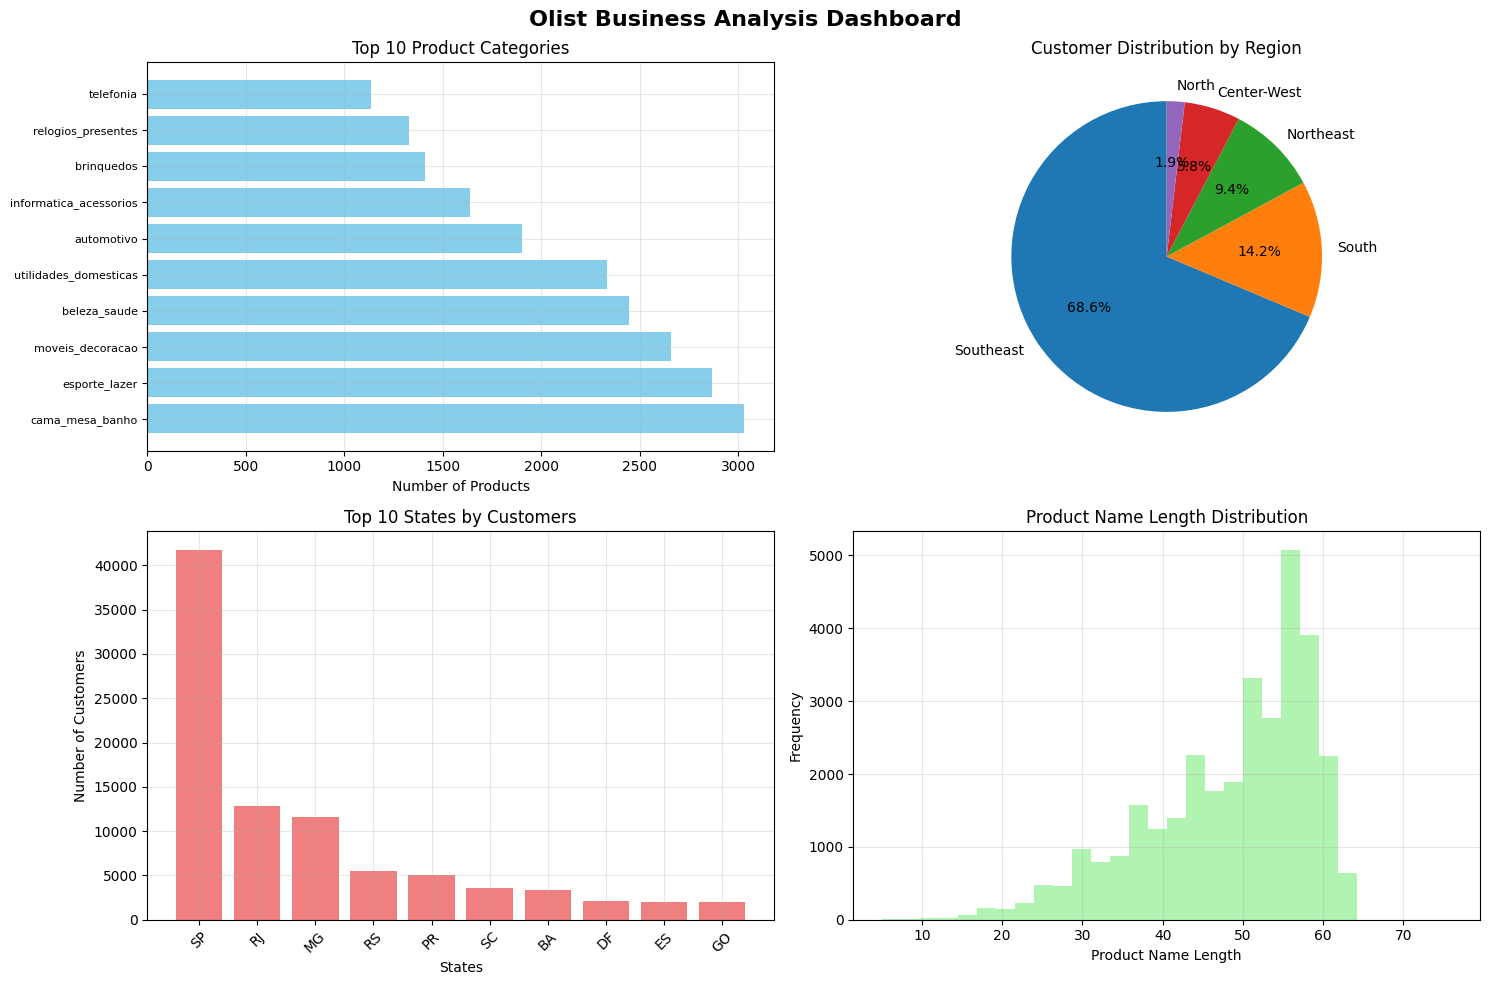

In [21]:
# Visualização dos dados
print("Creating visualizations...")

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Olist Business Analysis Dashboard', fontsize=16, fontweight='bold')

if 'product_category_name' in df_products_silver.columns:
    top_categories = products_by_category.head(10)
    axes[0, 0].barh(range(len(top_categories)), top_categories['product_count'], color='skyblue')
    axes[0, 0].set_yticks(range(len(top_categories)))
    axes[0, 0].set_yticklabels(top_categories.index, fontsize=8)
    axes[0, 0].set_xlabel('Number of Products')
    axes[0, 0].set_title('Top 10 Product Categories')
    axes[0, 0].grid(True, alpha=0.3)

if 'customer_region' in df_customers_silver.columns:
    region_data = df_customers_silver['customer_region'].value_counts()
    axes[0, 1].pie(region_data.values, labels=region_data.index, autopct='%1.1f%%', startangle=90)
    axes[0, 1].set_title('Customer Distribution by Region')

if 'customer_state' in df_customers_silver.columns:
    top_states = df_customers_silver['customer_state'].value_counts().head(10)
    axes[1, 0].bar(top_states.index, top_states.values, color='lightcoral')
    axes[1, 0].set_xlabel('States')
    axes[1, 0].set_ylabel('Number of Customers')
    axes[1, 0].set_title('Top 10 States by Customers')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)

if 'product_name_lenght' in df_products_silver.columns:
    axes[1, 1].hist(df_products_silver['product_name_lenght'], bins=30, color='lightgreen', alpha=0.7)
    axes[1, 1].set_xlabel('Product Name Length')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Product Name Length Distribution')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
# Preparação do machine learning
print("Preparing data for Machine Learning...")

from sklearn.preprocessing import LabelEncoder

products_ml = df_products_silver.copy()

if 'product_category_name' in products_ml.columns:
    le_category = LabelEncoder()
    products_ml['category_encoded'] = le_category.fit_transform(products_ml['product_category_name'])

    numeric_features = ['product_name_lenght', 'product_description_lenght',
                       'product_photos_qty', 'product_weight_g', 'product_length_cm',
                       'product_height_cm', 'product_width_cm']

    available_features = [f for f in numeric_features if f in products_ml.columns]

    if available_features:
        for feature in available_features:
            if products_ml[feature].isnull().sum() > 0:
                products_ml[feature].fillna(products_ml[feature].median(), inplace=True)

        print(f"ML dataset created: {len(products_ml)} records")
        print(f"Available features: {available_features}")
        print(f"Target classes: {products_ml['category_encoded'].nunique()}")

if 'customer_state' in df_customers_silver.columns:
    customers_ml = df_customers_silver.copy()
    le_state = LabelEncoder()
    customers_ml['state_encoded'] = le_state.fit_transform(customers_ml['customer_state'])

    if 'customer_region' in customers_ml.columns:
        le_region = LabelEncoder()
        customers_ml['region_encoded'] = le_region.fit_transform(customers_ml['customer_region'])

    print(f"Customer ML dataset: {len(customers_ml)} records")

print("\nData ready for ML analysis!")

Preparing data for Machine Learning...
ML dataset created: 32951 records
Available features: ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
Target classes: 74
Customer ML dataset: 99441 records

Data ready for ML analysis!
